# Import Dependencies

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# Import Dataframe

In [34]:
df = pd.read_csv("../datasets/stock/ZOMATO_2023.csv")

In [35]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-02,60.650002,60.700001,59.799999,60.299999,60.299999,18759536
1,2023-01-03,58.849998,59.549999,57.299999,58.950001,58.950001,49702768
2,2023-01-04,58.400002,58.700001,56.000000,56.349998,56.349998,48975781
3,2023-01-05,56.950001,57.099998,55.599998,56.200001,56.200001,34448671
4,2023-01-06,56.200001,56.400002,54.950001,55.250000,55.250000,30272416


In [36]:
df.set_index('Date',inplace=True)

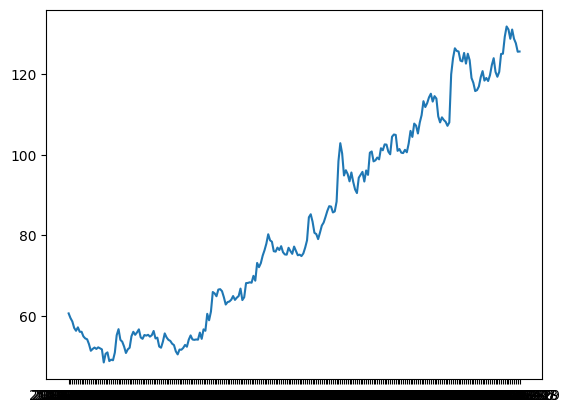

In [37]:
plt.plot(df.index,df['High'])

# Model Training

## Linear regression

In [38]:
df['Time'] = np.arange(len(df.index))

X = df.loc[:, ['Time']] 
y = df.loc[:, 'High'] 

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

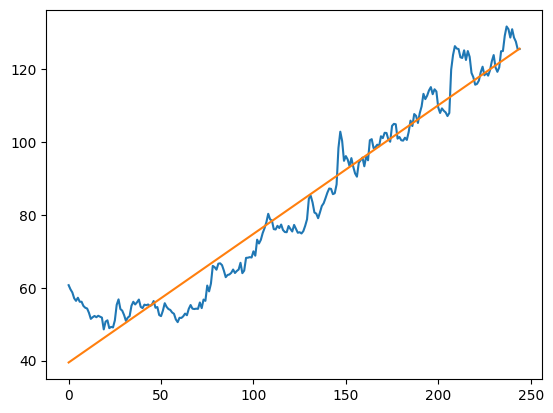

In [39]:
plt.plot(X,y)
plt.plot(X,y_pred)

### Make testing data

In [40]:
base = datetime.datetime.today() + datetime.timedelta(days=30)
date_list = [base - datetime.timedelta(days=x) for x in range(204)]

In [41]:
test = []
time = 245
for i in date_list[::-1]:
    test.append([str(i)[:10],time])
    time+=1

In [42]:
test = pd.DataFrame(test, columns=['Date','Time'])
test.set_index('Date',inplace=True)
test = test.loc[:, ['Time']] 

### Make Prediction

In [43]:
test_pred = pd.Series(model.predict(test), index=test.index)

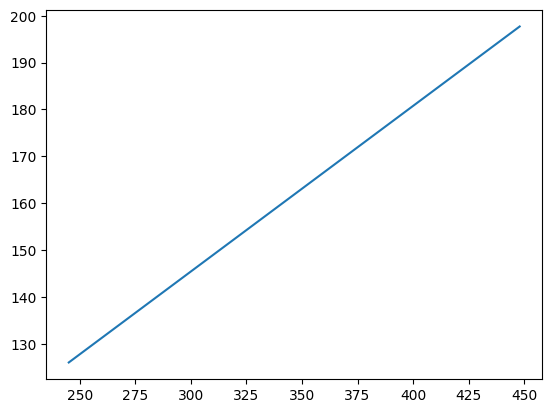

In [44]:
plt.plot(test['Time'],test_pred)